<center> 
    <h1> 
        Data Camp Project

 <center>
    <h1> 
        Prediction of the engagement rate on Instagram

# Table of content
1. [Introduction](#Introduction)
    - [Growing influence of Instagram](#See_later)
    - [Definition of the problem : Quantify the reaction to a post](#See_later)
2. [Data exploration](#Data_exploration)
    - [Data Processing](#Data_Processing)
    - [See later](#See_later)
    - [See later](#See_later)
3. [Workflow](#Workflow)
4. [Submission](#Submission)

# Import

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
import re

# Introduction

## Growing influence of Instagram

The leading treads towards social networking services had drawn massive
public attention from last one and half decade. The amount of data that is
uploaded to these social networking services is increasing day by day. So,
there is massive requirement to study the highly dynamic behavior of users
towards these services. Let's now focus of one the most used social networks : Instagram 

Instagram is an American photo and video sharing social networking service. In 2018, Instagram has reached 1 billion monthly active users. 

## Definition of the problem : Quantify the reaction to a post

Aim : Predict the engagment rate by instagramers

Scoring : "Root mean square error" which is defined by the following formula : 

    

# Data exploration

In [73]:
df = pd.read_csv('Data/cr7.csv')
print(df.shape)
df = df = df.iloc[:1072,:]
df.shape

(2980, 17)


(1072, 17)

In [66]:
df.dtypes

Links to profile                  object
Links to publication_gen_info     object
Name Account/Influencer           object
Professional Activity             object
Nationality                       object
Brand                             object
Account description               object
Number of posts                   object
Number of followers               object
Number of followings               int64
Verified Status                   object
Links to publication_pub_info     object
Post description                  object
Post number of comments          float64
Post number of likes              object
Posting date                      object
Media Type                        object
dtype: object

In [74]:
df["Posting date"][0]

'2015-12-03T12:56:22.000Z'

In [71]:
pd.to_datetime(df["Posting date"]).dt.day_name()

0       Thursday
1       Thursday
2       Thursday
3         Friday
4         Friday
          ...   
1067      Monday
1068      Monday
1069     Tuesday
1070     Tuesday
1071     Tuesday
Name: Posting date, Length: 1072, dtype: object

## Data Processing

In [75]:
df.head(2)

,Links to profile,Links to publication_gen_info,Name Account/Influencer,Professional Activity,Nationality,Brand,Account description,Number of posts,Number of followers,Number of followings,Verified Status,Links to publication_pub_info,Post description,Post number of comments,Post number of likes,Posting date,Media Type
0,https://www.instagram.com/cristiano/,https://www.instagram.com/p/-1JhCoBpan/,Cristiano Ronaldo,Footballeur,Portugal,Non,Cristiano Ronaldo,2 982 publications,252 764 771,459,Vérifié,h,Dedication ✌️👌👍💪🏽☀️,5493.0,887 059,2015-12-03T12:56:22.000Z,Photo
1,https://www.instagram.com/cristiano/,https://www.instagram.com/p/-1dEuSBpet/,Cristiano Ronaldo,Footballeur,Portugal,Non,Cristiano Ronaldo,2 982 publications,252 764 771,459,Vérifié,h,Job done!👌👔☀️ @sacoorbrothers,8546.0,1 064 362,2015-12-03T15:47:15.000Z,Photo


In [76]:
df['Post number of likes'] = df['Post number of likes'].apply(lambda x : x.replace(" ","")).astype(int)
df['Brand'] = df['Brand'].replace({'Non':0})
df['Verified Status'] = df['Verified Status'].replace({'Vérifié':0})
df['Media Type'] = df['Media Type'].replace({'Photo':0, 'Video':1})

#Count the number of words in the description
df['Number of words'] = pd.Series([len(re.findall(r'\w+', line)) for line in df['Post description']])

In [77]:
# df['Posting date'] = df['Posting date'].apply(lambda x : x.replace(':','-'))
# df['Posting date'] = df['Posting date'].apply(lambda x : x.replace('T','-'))
# df['Posting date'] = df['Posting date'].apply(lambda x : x.split('-'))

# import dateutil.parser
# df['Posting date'] = df["Posting date"].apply(dateutil.parser.isoparse()) # RFC 3339 format

df['Posting date'] = pd.to_datetime(df["Posting date"])

df['year of posting'] = df['Posting date'].dt.year
df['month of posting'] = df['Posting date'].dt.month
df['day of posting'] = df['Posting date'].dt.day
df['hour of posting'] = df['Posting date'].dt.hour
df['Day of the week of Posting'] = df['Posting date'].dt.day_name()

df = df.drop(columns = ['Posting date'])

In [62]:
df.head(5)

,Links to profile,Links to publication_gen_info,Name Account/Influencer,Professional Activity,Nationality,Brand,Account description,Number of posts,Number of followers,Number of followings,...,Post description,Post number of comments,Post number of likes,Media Type,Number of words,year of posting,month of posting,day of posting,hour of posting,Day of the week of Posting
0,https://www.instagram.com/cristiano/,https://www.instagram.com/p/-1JhCoBpan/,Cristiano Ronaldo,Footballeur,Portugal,0,Cristiano Ronaldo,2 982 publications,252 764 771,459,...,Dedication ✌️👌👍💪🏽☀️,5493.0,887059,0,1,2015,12,3,12,<bound method PandasDelegate._add_delegate_acc...
1,https://www.instagram.com/cristiano/,https://www.instagram.com/p/-1dEuSBpet/,Cristiano Ronaldo,Footballeur,Portugal,0,Cristiano Ronaldo,2 982 publications,252 764 771,459,...,Job done!👌👔☀️ @sacoorbrothers,8546.0,1064362,0,3,2015,12,3,15,<bound method PandasDelegate._add_delegate_acc...
2,https://www.instagram.com/cristiano/,https://www.instagram.com/p/-2P-gABpc2/,Cristiano Ronaldo,Footballeur,Portugal,0,Cristiano Ronaldo,2 982 publications,252 764 771,459,...,Good night ✌️👍⚽️❤️💋,8604.0,1117264,0,2,2015,12,3,23,<bound method PandasDelegate._add_delegate_acc...
3,https://www.instagram.com/cristiano/,https://www.instagram.com/p/-3oxF8hpUw/,Cristiano Ronaldo,Footballeur,Portugal,0,Cristiano Ronaldo,2 982 publications,252 764 771,459,...,Ready for tomorrow👌👍✌️✌👍🏻,6842.0,974506,0,3,2015,12,4,12,<bound method PandasDelegate._add_delegate_acc...
4,https://www.instagram.com/cristiano/,https://www.instagram.com/p/-4B0I3BpSS/,Cristiano Ronaldo,Footballeur,Portugal,0,Cristiano Ronaldo,2 982 publications,252 764 771,459,...,One of my favourite pieces from the X-mas coll...,7742.0,2280189,1,22,2015,12,4,15,<bound method PandasDelegate._add_delegate_acc...


In [37]:
##I changed in the cell above
# date_strings = []
# for i in range(df.shape[0]):
#     d = df.loc[i,'day of posting']
#     m = df.loc[i,'month of posting']
#     y = df.loc[i,'year of posting']
#     date_strings.append('{}-{}-{}'.format(d,m,y))
# df['Date of Posting'] = pd.Series([pd.to_datetime(date, format='%d-%m-%Y') for date in date_strings])

# df['Day of the week of Posting'] = df['Date of Posting'].dt.dayofweek

In [63]:
df.loc[df["year of posting"] == 2016]

,Links to profile,Links to publication_gen_info,Name Account/Influencer,Professional Activity,Nationality,Brand,Account description,Number of posts,Number of followers,Number of followings,...,Post description,Post number of comments,Post number of likes,Media Type,Number of words,year of posting,month of posting,day of posting,hour of posting,Day of the week of Posting
573,https://www.instagram.com/cristiano/,https://www.instagram.com/p/BA-ua30BpbE/,Cristiano Ronaldo,Footballeur,Portugal,0,Cristiano Ronaldo,2 982 publications,252 764 771,459,...,Great dinner with my mate👍👌✌️,5772.0,996430,0,5,2016,1,25,23,<bound method PandasDelegate._add_delegate_acc...
574,https://www.instagram.com/cristiano/,https://www.instagram.com/p/BA0Kv7lBpZM/,Cristiano Ronaldo,Footballeur,Portugal,0,Cristiano Ronaldo,2 982 publications,252 764 771,459,...,Bed time✌️👌⚽️❤️,10084.0,1200194,0,2,2016,1,21,20,<bound method PandasDelegate._add_delegate_acc...
575,https://www.instagram.com/cristiano/,https://www.instagram.com/p/BA11OGFhpaK/,Cristiano Ronaldo,Footballeur,Portugal,0,Cristiano Ronaldo,2 982 publications,252 764 771,459,...,Again winning team ⚽️⚽️👍👌✌️,5000.0,908956,0,3,2016,1,22,12,<bound method PandasDelegate._add_delegate_acc...
576,https://www.instagram.com/cristiano/,https://www.instagram.com/p/BA2OKW1Bpc4/,Cristiano Ronaldo,Footballeur,Portugal,0,Cristiano Ronaldo,2 982 publications,252 764 771,459,...,Boom💪🏽👍⚽️,5244.0,924470,0,1,2016,1,22,15,<bound method PandasDelegate._add_delegate_acc...
577,https://www.instagram.com/cristiano/,https://www.instagram.com/p/BA2k9sEBpct/,Cristiano Ronaldo,Footballeur,Portugal,0,Cristiano Ronaldo,2 982 publications,252 764 771,459,...,Relaxing😉😉😝👍✌️👌,9672.0,938998,0,1,2016,1,22,19,<bound method PandasDelegate._add_delegate_acc...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1067,https://www.instagram.com/cristiano/,https://www.instagram.com/p/BI21oJNgAVG/,Cristiano Ronaldo,Footballeur,Portugal,0,Cristiano Ronaldo,2 982 publications,252 764 771,459,...,Solid work👌,14483.0,1623641,0,2,2016,8,8,17,<bound method PandasDelegate._add_delegate_acc...
1068,https://www.instagram.com/cristiano/,https://www.instagram.com/p/BI2iydpgtOJ/,Cristiano Ronaldo,Footballeur,Portugal,0,Cristiano Ronaldo,2 982 publications,252 764 771,459,...,Wake up after a great nap with crj✌️👍🔝,11566.0,1664770,0,8,2016,8,8,15,<bound method PandasDelegate._add_delegate_acc...
1069,https://www.instagram.com/cristiano/,https://www.instagram.com/p/BI4aCHng_Lc/,Cristiano Ronaldo,Footballeur,Portugal,0,Cristiano Ronaldo,2 982 publications,252 764 771,459,...,"Now you can have a selfie with me anytime, any...",12355.0,3808426,1,44,2016,8,9,8,<bound method PandasDelegate._add_delegate_acc...
1070,https://www.instagram.com/cristiano/,https://www.instagram.com/p/BI50hEcAAQE/,Cristiano Ronaldo,Footballeur,Portugal,0,Cristiano Ronaldo,2 982 publications,252 764 771,459,...,Champions.,16740.0,1941855,0,1,2016,8,9,21,<bound method PandasDelegate._add_delegate_acc...


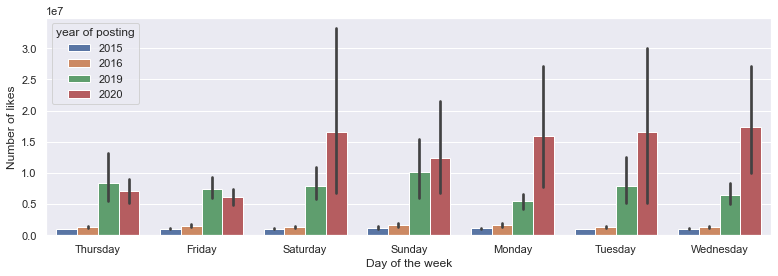

In [78]:
plt.figure(figsize=(13,4))
#sns.barplot(x = 'Day of the week of Posting',y = 'Post number of likes', data = df)
sns.barplot(x="Day of the week of Posting", y="Post number of likes", hue="year of posting", data=df)
plt.ylabel('Number of likes')
plt.xlabel('Day of the week')
plt.show()

# Workflow

The work flow is composed of two essential elements that make up the submission: the feature extractor and the regressor. The first allows both the preparation of initial data and the creation of new variables. The second, on the other hand, allows a supervised learning model to be trained so that the engagement rate on Instagram's post can be correctly predicted. This model is trained on a part of the base obtained from the feature extractor output, then is evaluated on the remaining part.

# Submission

In [46]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import FunctionTransformer, OrdinalEncoder, StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline

def processing_data(X):
    
    X['Post number of likes'] = X['Post number of likes'].apply(lambda x : x.replace(" ","")).astype(int)
    X['Media Type'] = df['Media Type'].replace({'Photo':0, 'Video':1})

    X['Number of words'] = pd.Series([len(re.findall(r'\w+', line)) for line in X['Post description']])
    
    X['Posting date'] = X['Posting date'].apply(lambda x : x.replace(':','-'))
    X['Posting date'] = X['Posting date'].apply(lambda x : x.replace('T','-'))
    X['Posting date'] = X['Posting date'].apply(lambda x : x.split('-'))

    X['year of posting'] = X['Posting date'].apply(lambda x : x[0])
    X['month of posting'] = X['Posting date'].apply(lambda x : x[1])
    X['day of posting'] = X['Posting date'].apply(lambda x : x[2])
    X['hour of posting'] = X['Posting date'].apply(lambda x : x[3])
    
    date_strings = []
    for i in range(df.shape[0]):
        d, m, y = X.loc[i,'day of posting'], X.loc[i,'month of posting'], X.loc[i,'year of posting']
        date_strings.append('{}-{}-{}'.format(d,m,y))
    X['Date of Posting'] = pd.Series([pd.to_datetime(date, format='%d-%m-%Y') for date in date_strings])
    X['Day of the week of Posting'] = X['Date of Posting'].dt.dayofweek
    
    return X.values
    